# Visualizing periodic signals using a river plot

## Learning Goals

By the end of this tutorial, you will:

- Understand what a river plot is.
- Understand when river plots are useful.
- Be able to create and interpret a river plot.

## Introduction

A "river plot" is a method to visualize periodic signals that vary over time. It is created by breaking a light curve into segments of equal length, such as the period of a planet orbiting a star, and displaying the segments side by side to allow the flux values to be compared. This allows you to examine how an entire light curve varies relative to a fixed period. It is similar to a "[waterfall plot](https://en.wikipedia.org/wiki/Waterfall_plot)" which is used to similarly analyze time variation in spectra. 

This tutorial demonstrates how to create a river plot using [Lightkurve](https://docs.lightkurve.org).

## Imports

This tutorial requires the [**Lightkurve**](http://docs.lightkurve.org/) package, which uses [**Matplotlib**](https://matplotlib.org/) for plotting.

In [1]:
import lightkurve as lk
%matplotlib inline

---

## 1. When is a River Plot Useful?

When we are looking for periodic signals in a light curve, sometimes it can be useful to see how they evolve over time. You can do this using the Lightkurve method `plot_river` on a `FoldedLightCurve` object.

We start by downloading some example data. We'll use the target KIC 6185476, which is also known as KOI-227. This object exhibits strong transit timing variations (TTVs), that is, the transit time of the planet candidate changes over time. This happens when the orbit of a planet is not precisely periodic due to, for example, the presence of multiple moving stars or planets in the system.

We can use Lightkurve's `search_lightcurve` function to get all of the available light curves from MAST and stitch them together.

In [2]:
lc = lk.search_lightcurve('KIC 6185476', author='Kepler', cadence='long').download_all().stitch()

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

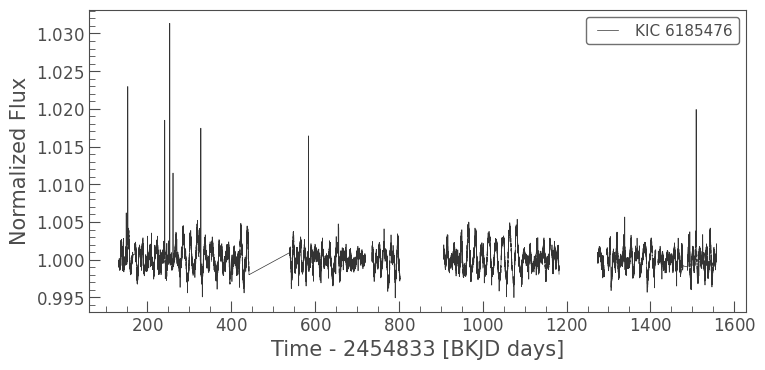

In [3]:
lc.plot();

When we plot the data, we see that there is a long-term trend, likely from starspots. We can remove this with a Savitzky-Golay filter using Lightkurve's `flatten` method.

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

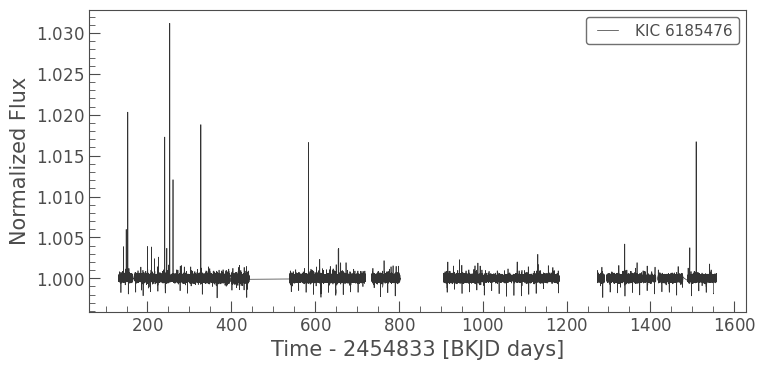

In [4]:
clc = lc.flatten(21)
clc.plot();

The light curve is now flat. Let's fold the light curve and plot it.

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

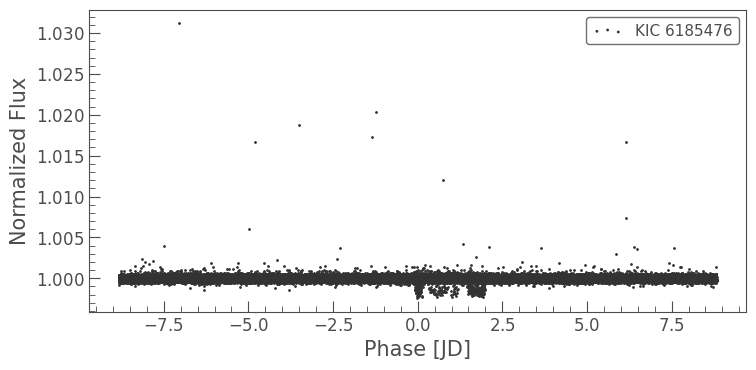

In [5]:
# Period (p) and and reference transit time (t0) are taken from the NASA Exoplanet Archive
p, t0 = 17.660114, 136.57258
folded_lc = clc.fold(period=p, epoch_time=t0)
folded_lc.scatter();

It looks like there is a concentration of points that are around phase of `0`, but they don't seem to line up nicely. This is caused by the transit of the planet occurring slightly before or after you would predict using a constant period. Cases of planets with meaningful TTVs are well suited for further analysis using a river plot.

## 2. Creating a River Plot

We can use the `plot_river` method to plot the light curve in a more legible way. This must be performed on a folded `LightCurve`.

<AxesSubplot:title={'center':'KIC 6185476'}, xlabel='Phase', ylabel='Cycle'>

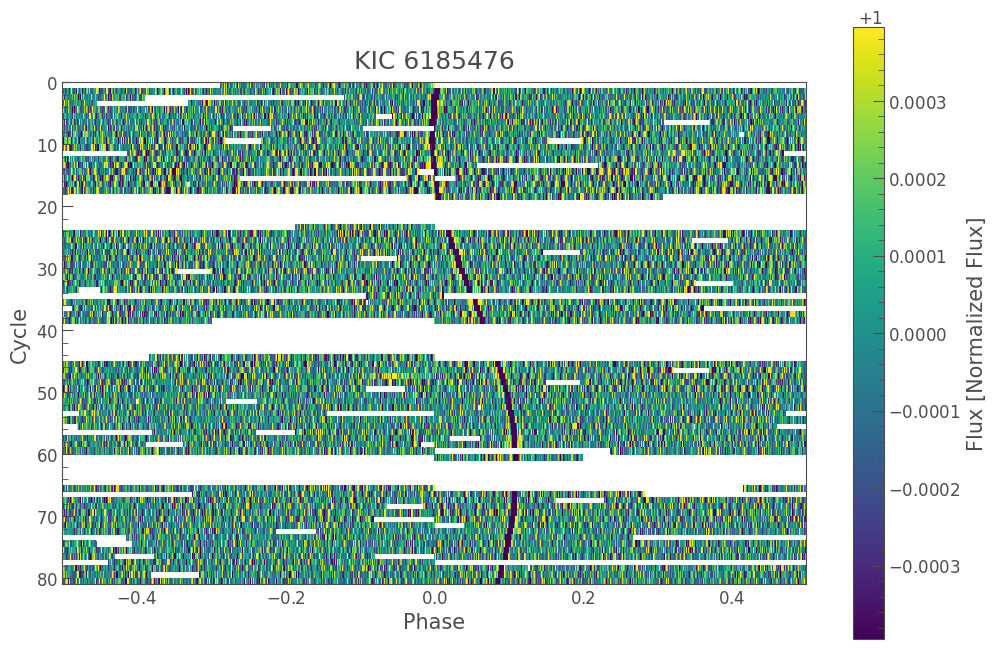

In [6]:
folded_lc.plot_river();

The river plot shows the same plot as the `fold` method, but each time the light curve is folded, a new row is started in the plot. The colorbar then shows the flux in each part of the light curve. 

In this case we see a beautiful trend as the planet candidate orbit changes. In some cases, the signal won't be this obvious. We can also use the `plot_river` method to bin in time to increase the signal to noise in any bin.

<AxesSubplot:title={'center':'KIC 6185476'}, xlabel='Phase', ylabel='Cycle'>

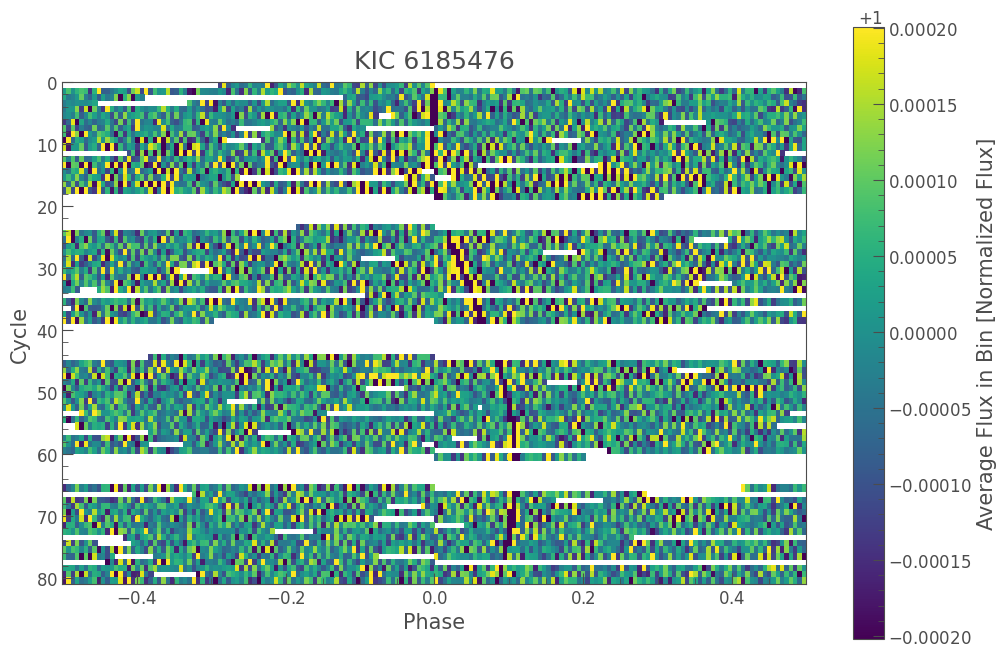

In [7]:
folded_lc.plot_river(bin_points=5, method='median');

## 3. Changing the Scale to Standard Deviation

Finally, we can also use `plot_river` to look at the folded light curve in terms of standard deviation. This is useful when looking for signals that are of high significance.

<AxesSubplot:title={'center':'KIC 6185476'}, xlabel='Phase', ylabel='Cycle'>

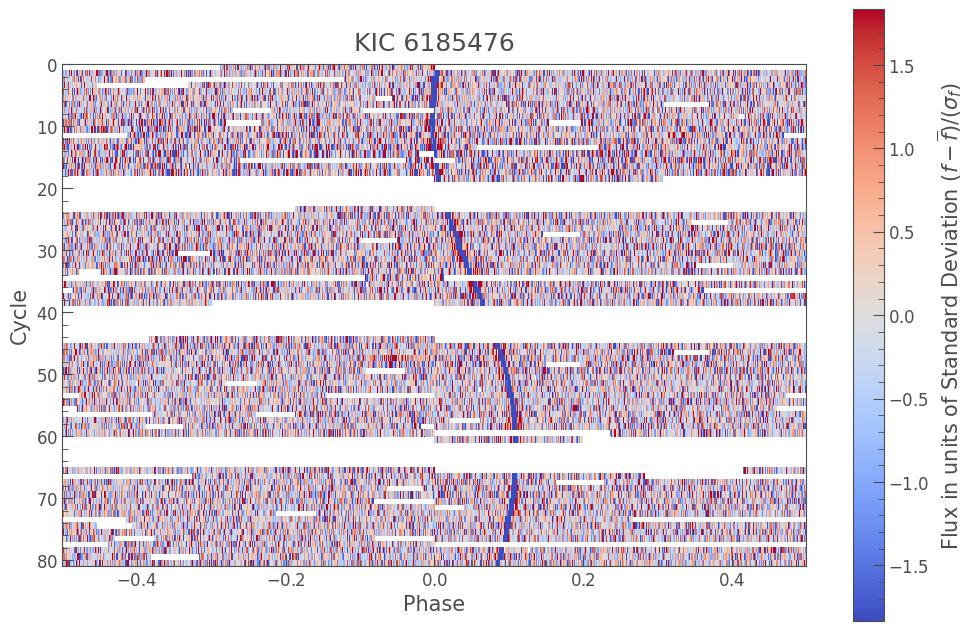

In [8]:
folded_lc.plot_river(bin_points=1, method='sigma');

We see in the above river plot that there is a signal around phase of `0` (our planet candidate) that has a clear deviation from the mean, showing that it is a significant detection.

## About this Notebook

**Authors:** Christina Hedges (christinalouisehedges@gmail.com), Nicholas Saunders (nksaun@hawaii.edu)

**Updated On:** 2020-09-29

## Citing Lightkurve and its Dependencies

If you use `lightkurve` or its dependencies for published research, please cite the authors. Click the buttons below to copy BibTeX entries to your clipboard.

In [9]:
lk.show_citation_instructions()

<img style="float: right;" src="https://raw.githubusercontent.com/spacetelescope/notebooks/master/assets/stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="Space Telescope Logo" width="200px"/>